# Customer Churn(Capstone Project)



In [1]:
#creating a project on customer churn for a telecom company
#The project is about why employees are churning from a telecom company to the competitors company.you have to analyse the dataset and find the insights on why it is happening and how can you stop this

# Importing Libraries

In [2]:
#importing libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
customer_churn = pd.read_csv("C://Users//Abhishek-pc//Downloads//archive (1)//customer_churn.csv")

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn.shape

(7043, 21)

# Data Manipulation

In [6]:
#Extract the 5th column and store it in ‘customer_5’
customer_5 = customer_churn.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [7]:
#Extract the 15th column and store it in ‘customer_15’
customer_15 = customer_churn.iloc[:,14] 
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [8]:
# Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic = customer_churn[(customer_churn["gender"]=="Male") & (customer_churn["SeniorCitizen"]==1) & (customer_churn["PaymentMethod"]=="Electronic check")]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [9]:
# Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure = customer_churn[(customer_churn["tenure"]>70) | (customer_churn["MonthlyCharges"]>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [10]:
#Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes = customer_churn[(customer_churn["Contract"]=="Two year") & (customer_churn["PaymentMethod"]=="Mailed check") & (customer_churn["Churn"]=="Yes")]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [11]:
#Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’
customer_333 = customer_churn.sample(n = 333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2739,4455-BFSPD,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),101.15,6383.9,No
1152,4320-QMLLA,Male,0,No,No,7,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,54.85,370.4,No
882,3908-BLSYF,Female,0,No,No,6,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,83.90,497.55,Yes
2281,9578-VRMNM,Female,0,No,No,16,Yes,Yes,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),65.20,1043.35,Yes
46,5948-UJZLF,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.25,97,No


In [12]:
#Get the count of different levels from the ‘Churn’ column
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
#random example of count on contract(it is of no use)
customer_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

# Data Visualiation


Text(0.5, 1.0, 'Distribution of Internet Service')

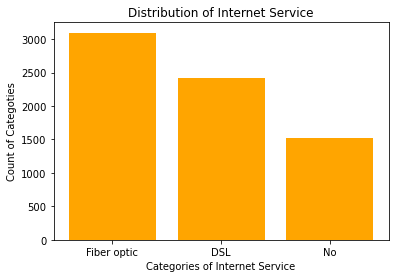

In [14]:
#Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange'

plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist(),color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categoties")
plt.title("Distribution of Internet Service")

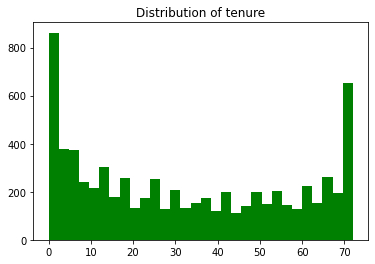

In [15]:
#Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title 'Distribution of tenure'

plt.hist(customer_churn['tenure'], bins = 30, color = 'green')
plt.title('Distribution of tenure')
plt.show()

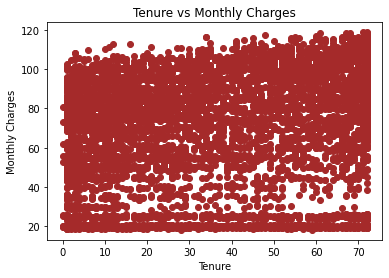

In [16]:
#Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#a. Assign the points a color of ‘brown’
#b. Set the x-axis label to ‘Tenure of customer’
#c. Set the y-axis label to ‘Monthly Charges of customer’
#d. Set the title to ‘Tenure vs Monthly Charges’


#Scatter plot
plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'], color='brown')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs Monthly Charges')
plt.show()

C:\Users\Abhishek-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='tenure'>

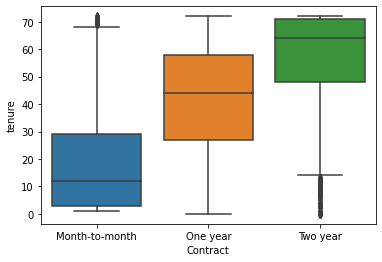

In [17]:
#e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
#f. ‘Contract’ on the x-axis
#Box PLot
import seaborn as sns
sns.boxplot(customer_churn['Contract'], customer_churn['tenure']) #using seaborn to get the box plot

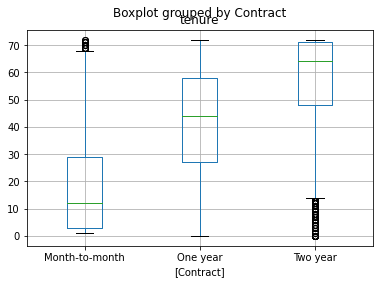

In [18]:
#Another way to get a box plot 
customer_churn.boxplot(column=['tenure'],by=['Contract'])
plt.show()


# Machine Learning

In [19]:
#Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
#a. Divide the dataset into train and test sets in 70:30 ratio.
#b. Build the model on train set and predict the values on test set
#c. After predicting the values, find the root mean square error
#d. Find out the error in prediction & store the result in ‘error’
#e. Find the root mean square error

#importing Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#dependent variable is x and independent variable is y 
x = customer_churn[['tenure']]
y = customer_churn[['MonthlyCharges']]

#dividing the dataset into train_test_split and training the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

#fitting the model 
regressor = LinearRegression()

regressor.fit(x_train, y_train)

#predicting the value 
y_pred = regressor.predict(x_test)

#getting the root mean_squared_error
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))
#As the mean_squared_error is lesser the train test is good

29.394584027273893

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4930, 1), (2113, 1), (4930, 1), (2113, 1))

In [21]:
#random thought of tenure and monthly charges(not of use)
y_pred[:5], y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),
       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

Logistic Regression

In [37]:
#Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
#a. Divide the dataset in 65:35 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and get the accuracy score

#simple Logistic Regression

#importing libraries
from sklearn.linear_model import LogisticRegression

#x and y
x = customer_churn[['MonthlyCharges']]
y = customer_churn[['Churn']]

#dividing the dataset and creating the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

#fitting the model
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

#predicting the value
y_pred = log_model.predict(x_test)

#building a confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)


C:\Users\Abhishek-pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[1815,    0],
        [ 651,    0]], dtype=int64),
 0.7360097323600974)

In [38]:
1815/(1815+651) #verified

0.7360097323600974

In [57]:
#d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are
#   'tenure’ and ‘MonthlyCharges’
#e. Divide the dataset in 80:20 ratio
#f. Build the model on train set and predict the values on test set
#g. Build the confusion matrix and get the accuracy score

#Multiple Logistic Regression
x = customer_churn[['MonthlyCharges','tenure']]
y = customer_churn[['Churn']]

#splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

#fitting the model
Mlog_model = LogisticRegression()
Mlog_model.fit(x_train, y_train)

#predicting the value
y_pred = Mlog_model.predict(x_test)

#BUilding Confusion_matrix and accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)


C:\Users\Abhishek-pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[934, 107],
        [212, 156]], dtype=int64),
 0.7735982966643009)

In [ ]:
(934+156)/(934+107+212+156) #verified

Decision Tree

In [68]:
#Build a decision tree model where dependent variable is ‘Churn’ and
#independent variable is ‘tenure’:
#a. Divide the dataset in 80:20 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and calculate the accuracy

#importing libraries
from sklearn.tree import DecisionTreeClassifier

#x and y
x = customer_churn[['tenure']]
y = customer_churn[['Churn']]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

#fitting the model
my_tree = DecisionTreeClassifier()
my_tree.fit(x_train, y_train)

#predicting the value
y_pred = my_tree.predict(x_test)

#confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)


(array([[965,  76],
        [281,  87]], dtype=int64),
 0.7466288147622427)

In [63]:
(965+87)/(965+76+281+87)

0.7466288147622427

Random Forest

In [67]:
#Build a Random Forest model where dependent variable is ‘Churn’ and
#independent variables are ‘tenure’ and ‘MonthlyCharges’:
#a. Divide the dataset in 70:30 ratio
#b. Build the model on train set and predict the values on test set
#c. Build the confusion matrix and calculate the accuracy

#importing libraries
from sklearn.ensemble import RandomForestClassifier

#x and y
x = customer_churn[['tenure','MonthlyCharges']]
y = customer_churn[['Churn']]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

#fitting the model
random = RandomForestClassifier()
random.fit(x_train, y_train)

#predicting the value 
y_pred = random.predict(x_test)

#confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred), accuracy_score(y_test,y_pred)

C:\Users\Abhishek-pc\AppData\Local\Temp\ipykernel_8912\4139284463.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train, y_train)


(array([[1343,  217],
        [ 322,  231]], dtype=int64),
 0.7449124467581637)

In [ ]:
#The entire end-to-end data science project which had:
#Data Manipulation
#Data Visualization
#Machine Learning algorithms